# The Workflow of a Machine Learning Engineer: a Very Simple Machine Learning Project
In this project, I try to go through and simplify the workflow of a machine learning engineer or a data scientist in general. It's like a simplification of the daily life of a data scientist.

In [1]:
# all the necessary imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pickle

# choosing a style for our graphs. Nothing fancy
from matplotlib import style
style.use('ggplot')

## Data Analysis

Machine learning has to do with machines learning from data and by so doing, becoming 'smart'.

Let's load the data and try and understand it

In [2]:
# loading data into python
df = pd.read_csv('data.csv')
df.head()

,A,B,C
0,2,3,8.5
1,1,2,5.5
2,4,1,10.5
3,3,2,9.5
4,2,1,6.5


### Label?
This is a supervised learning problem. As such, we have to define our label. More like: what do we want to predict in the future?

### Features
The features also have to be defined. A feature in this case is what we would use to predict the label. 

Basically, a relationship will be found between the features and the labels such than, in the future, when the features are given, the machine can predict the label based on the current data. (That's machine learning after all, right?)

In this project, we will define our label as the column labelled 'C' and our features will be columns 'A' and 'B' 

In [3]:
# what is our label?
label = "C"
y = np.array(df[label])

# what are the features?
X = np.array(df.drop('C', axis=1))

# PS: We usually represent our features with a capital X and our label with a small y

### What's the relationship between the label and the features?
Here, we try to find the correlation between the features and the Label. This is to get an insight of what sort of model is best for this problem; making it easy to select the model to use

#### Relationship between 'A' and 'C'

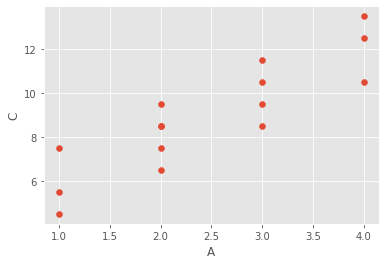

In [4]:
# using matplotlib to plot a scatter diagram of A and C
C = np.array(df['C'])
A = np.array(df['A'])
plt.scatter(A, C)
plt.xlabel('A')
plt.ylabel('C')
plt.show()

From the above graph, we could easily guess that there's a linear relationship between 'A' and 'C'.

#### Relationship between 'B' and 'C'

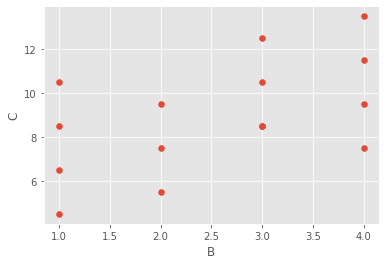

In [5]:
# also making a scatter plot of B against C
B = np.array(df['B'])
plt.scatter(B, C)
plt.xlabel('B')
plt.ylabel('C')
plt.show()

This one ins't as clear as the previous graph but we could still consider the above graph also as indicating a linear relationship between 'B' and 'C'

## The ML itself

Now that we have some insight from the data, we can now make an educated guess of the model/algorithm to use for this project.

With all the observed linear relationship between the features and the label, it's not suprise our best bet would be to decide to use a linear regression model. The reason for the import at the top.

In [6]:
model = LinearRegression()

### Training vs Testing
Not so fast. Hehe...

We can't just train a model and leave it like that or just start using it after testing.
Well, we could but it's a really bad thing to do.

After training a model, the next step is to test your model. To do this, we need to split the data that we have into two parts: one for training and the other for testing the model. To do that, we use a function from the sklearn package imported earlier.
(More reason most ML engineers use python.)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1) 
# the test size is the fraction of the data to use for testing

### Training
Training is quite simple, actually. Now that we've split our data, we can now train our model with the training set

In [8]:
# training
model.fit(X_train, y_train)

LinearRegression()

### Testing
After training, we test our model to see how it performs

In [9]:
model.score(X_test, y_test)

1.0

Now, our model is an ideal one, we've got a score of 1 out of 1. It's more like how accurate the model is.

I do have to say that the data we used here is really far from the real world. It is a really simple one I created myself using a mathematical relation for the purpose of this project

## Let's save our model

We definately do not want to train our model every single time we want to use it to make a prediction. The training process will take time and a lot of computing data, to be realistic. For this reason, we have to save our trained models that we can use in the future.

The python package, pickle, allows us to do that.
We've already imported that at the top. Let's use it

In [10]:
with open("linear_regression_model.pickle", "wb") as f:
    pickle.dump(model, f)

### Loading the model

We can now load back our saved model and use it for predictions

In [11]:
model_file = open("linear_regression_model.pickle", "rb")
loaded_model = pickle.load(model_file)

loaded_model.predict(np.array([[0, 0]]))

array([1.5])

### How do we know that this predicted value is right?

Actually, we don't. It could be wrong (Our model lies?).
But we could be confident based on the accuracy of our model.

## The Data I used

$$C=1.5+2A+B$$

I created this dataset myself for this specific project using the above relation

Oh look, our model was right after all:. When $A$ and $B$ are both 0, C is indeed $1.5$